# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
# Load the dataset
ames = pd.read_csv("ames.csv")
# Display the first few rows of the dataset
print(ames.head())
# Display the shape of the dataset
print(ames.shape)
# Display the column names
print(ames.columns)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [3]:
# Your code here - drop columns with missing data
ames = ames.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

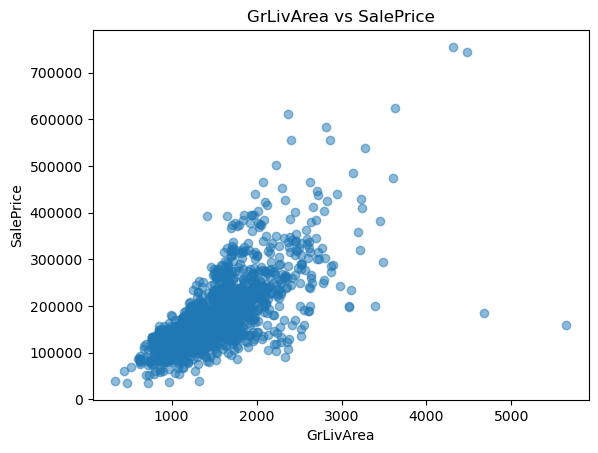

In [4]:
# Your code here - continuous numeric predictor
# Use the 'GrLivArea' column as a continuous numeric predictor
X = ames[['GrLivArea']]
y = ames['SalePrice']

import matplotlib.pyplot as plt
# Your code here - scatter plot
plt.scatter(X, y, alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()

### Discrete Numeric Predictor

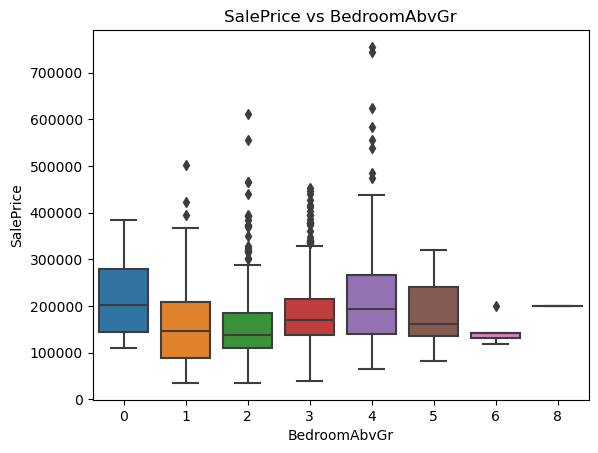

In [5]:
# Your code here - discrete numeric predictor
import seaborn as sns
# Use the 'BedroomAbvGr' column as a discrete numeric predictor
X = ames[['BedroomAbvGr']]
y = ames['SalePrice']

sns.boxplot(x=X['BedroomAbvGr'], y=y)
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.title('SalePrice vs BedroomAbvGr')
plt.show()

### String Categorical Predictor

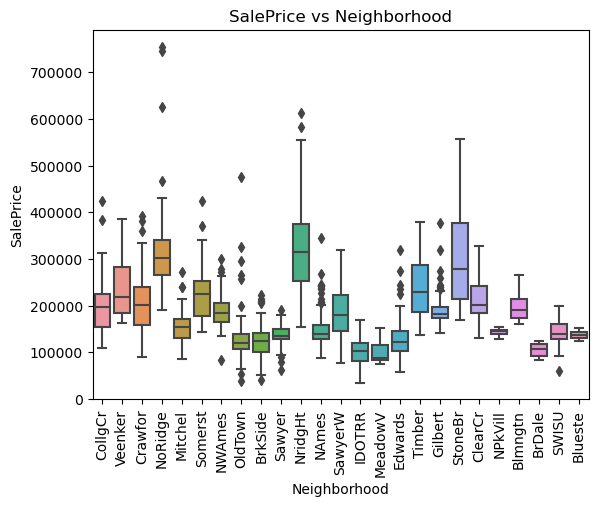

In [6]:
# Your code here - string categorical predictor
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = ames)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('SalePrice vs Neighborhood')
plt.show()

### Discrete Categorical Predictor

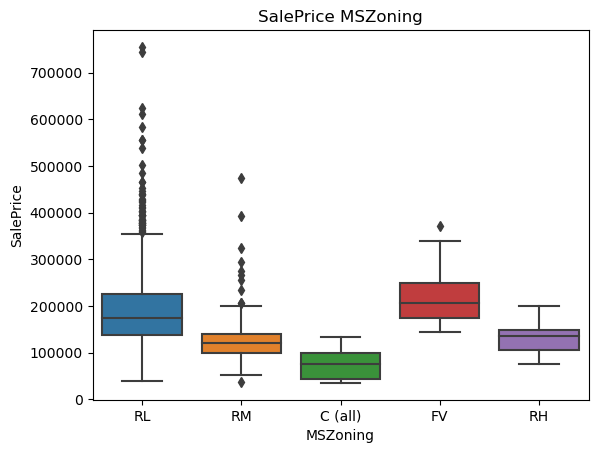

In [7]:
# Your code here - discrete categorical predictor
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = ames)
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.title('SalePrice MSZoning')
plt.show()



## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [8]:
# Your code here - prepare X and y, including one-hot encoding
X = ames[['GrLivArea', 'BedroomAbvGr', 'MSZoning']]
X = pd.get_dummies(X, drop_first=True)
y = ames['SalePrice']


In [9]:
# Your answer here - which category or categories were dropped?
# The dropped category was **'MSZoning_C (all)'**. 

# This happens because `pd.get_dummies(X, drop_first=True)` was used, which drops the first category alphabetically to avoid multicollinearity (the "dummy variable trap") in regression. By dropping one category, the remaining dummy variables fully represent the categorical variable.


In [10]:
# Your code here - build a regression model and display results
import statsmodels.api as sm
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())  # Display the summary of the regression results



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     375.5
Date:                Mon, 19 May 2025   Prob (F-statistic):          3.53e-291
Time:                        12:38:30   Log-Likelihood:                -17860.
No. Observations:                1460   AIC:                         3.573e+04
Df Residuals:                    1453   BIC:                         3.577e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9496.1700   1.62e+04     -0.584   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

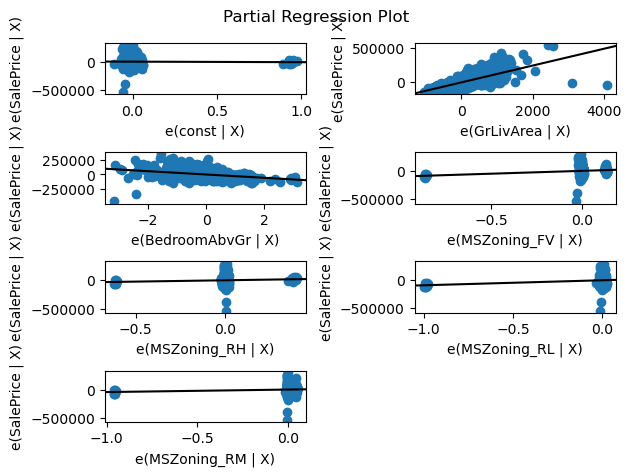

In [11]:
# Your code here - create partial regression plots
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [12]:
# Your code here - calculate an error-based metric
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Get model predictions
y_pred = model.predict(X)
# Calculate MAE
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 32764.64
Root Mean Squared Error (RMSE): 49724.48


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
The model shows that 'GrLivArea', 'BedroomAbvGr', and 'MSZoning' are statistically significant predictors of SalePrice, but the RMSE and MAE values indicate there is still substantial error in predictions. The partial regression plots suggest some non-linearity and potential outliers. To improve the model, I would:
 - Explore additional predictors and feature engineering
 - Consider transforming skewed variables (e.g., log-transform SalePrice)
 - Investigate and handle outliers
 - Try regularization or more complex models
 - Use cross-validation to better estimate model performance


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [13]:
# Your code here
from sklearn.linear_model import LinearRegression

# Drop the 'const' column for scikit-learn (it adds intercept automatically)
X_sklearn = X.drop(columns=['const'])

# Fit scikit-learn linear regression
lr = LinearRegression()
lr.fit(X_sklearn, y)
y_pred_sklearn = lr.predict(X_sklearn)

# Calculate metrics
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred_sklearn))

print(f"scikit-learn MAE: {mae_sklearn:.2f}")
print(f"scikit-learn RMSE: {rmse_sklearn:.2f}")

# Compare with statsmodels
print(f"statsmodels MAE: {mae:.2f}")
print(f"statsmodels RMSE: {rmse:.2f}")

# Investigate differences
coef_diff = lr.intercept_ - model.params['const']
print(f"Difference in intercept: {coef_diff:.2f}")
print("Difference in coefficients:")
for col, coef in zip(X_sklearn.columns, lr.coef_):
    sm_coef = model.params[col]
    print(f"{col}: scikit-learn={coef:.4f}, statsmodels={sm_coef:.4f}, diff={coef - sm_coef:.4f}")

scikit-learn MAE: 32764.64
scikit-learn RMSE: 49724.48
statsmodels MAE: 32764.64
statsmodels RMSE: 49724.48
Difference in intercept: 0.00
Difference in coefficients:
GrLivArea: scikit-learn=124.0568, statsmodels=124.0568, diff=-0.0000
BedroomAbvGr: scikit-learn=-27729.1871, statsmodels=-27729.1871, diff=-0.0000
MSZoning_FV: scikit-learn=100700.4798, statsmodels=100700.4798, diff=0.0000
MSZoning_RH: scikit-learn=47299.2398, statsmodels=47299.2398, diff=-0.0000
MSZoning_RL: scikit-learn=89124.6506, statsmodels=89124.6506, diff=-0.0000
MSZoning_RM: scikit-learn=44430.8921, statsmodels=44430.8921, diff=-0.0000


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.